In [7]:
%matplotlib inline
from statistics import mode
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [2]:
#!pip install geopandas

In [3]:
#!pip install mapclassify

In [8]:
df = pd.read_csv('hotel_bookings.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From the info above, we can observe the columns with empty emtries are: **children, country, agent, and company**. And we want to drop "agent" and "company" columns here.

In [7]:
df.shape

(119390, 32)

# EDA

In [14]:
# find the number of bookings canceled vs. not canceled
df.groupby('is_canceled').size()

is_canceled
0    75166
1    44224
dtype: int64

### Cancel Rate by Hotel Types

In [8]:
# Fisrt, we want to analyze the cancel rate by separating the hotel types 
resort_canceled = len(df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 1)].index)
city_canceled = len(df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 1)].index)
resort = len(df.loc[(df["hotel"] == "Resort Hotel")].index)
city = len(df.loc[(df["hotel"] == "City Hotel")].index)

In [9]:
# Calculate the canceled rate for each types of hotel
resort_canceled_rate = resort_canceled/resort
city_canceled_rate = city_canceled/city
total_canceled_rate = (resort_canceled+city_canceled)/(resort+city)

In [10]:
print('Total Cancel Rate: ',total_canceled_rate)
print('Resort Hotel Canceled Rate: ',resort_canceled_rate)
print('City Hotel Canceled Rate: ',city_canceled_rate)

Total Cancel Rate:  0.37041628277075134
Resort Hotel Canceled Rate:  0.27763354967548676
City Hotel Canceled Rate:  0.41726963317786464


Text(0.5, 1.0, 'Resort and City Hotels Cancel Rate')

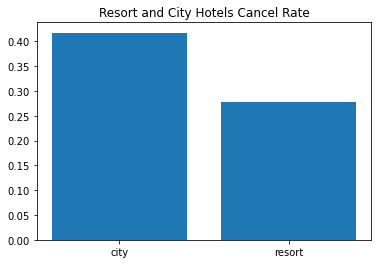

In [11]:
# initialize list of lists
data = [['city', city_canceled_rate], ['resort', resort_canceled_rate]]
 
# Create the pandas DataFrame
city_resort = pd.DataFrame(data, columns = ['hotel', 'cancel rate'])
 
# Plot the histogram
plt.bar(city_resort['hotel'], city_resort['cancel rate'])
plt.title('Resort and City Hotels Cancel Rate')

### Booking Counts by Country

[Text(0.5, 1.0, 'Top 10 Counts by Country')]

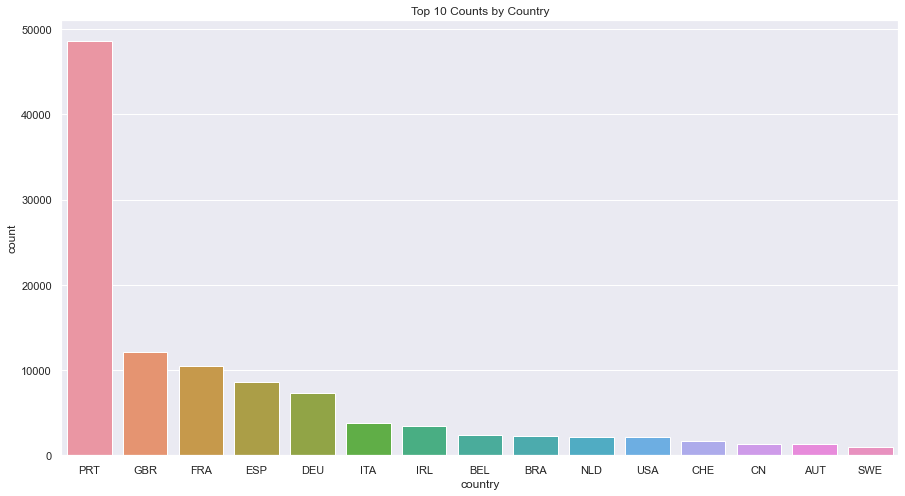

In [16]:
# now we want to take a closer look at the 'country' column and see where the guests come from
country_guests = df.groupby('country').size()

# visualize the count here is a better option
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'country', data = df, order = df['country'].value_counts().iloc[:15].index).set(title = 'Top 10 Counts by Country')

In [17]:
# group by country and count the canceled bookings
cancel_by_country = df[['country','is_canceled']]
# cancel_by_country = df[['country','is_canceled']].groupby(['country'])
cancel_by_country = cancel_by_country.groupby(['country']).sum()
cancel_by_country = cancel_by_country.reset_index()
cancel_by_country

,country,is_canceled
0,ABW,0
1,AGO,205
2,AIA,0
3,ALB,2
4,AND,5
...,...,...
172,VGB,1
173,VNM,2
174,ZAF,31
175,ZMB,1


In [18]:
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

cancel_by_country = cancel_by_country.rename(columns={"country": "CODE"})
# then merge with our data 
merge = pd.merge(world,cancel_by_country,on='CODE')

# get the longitude and latitude, then merge
location = pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge = merge.merge(location,on='name').sort_values(by='is_canceled',ascending=False).reset_index()

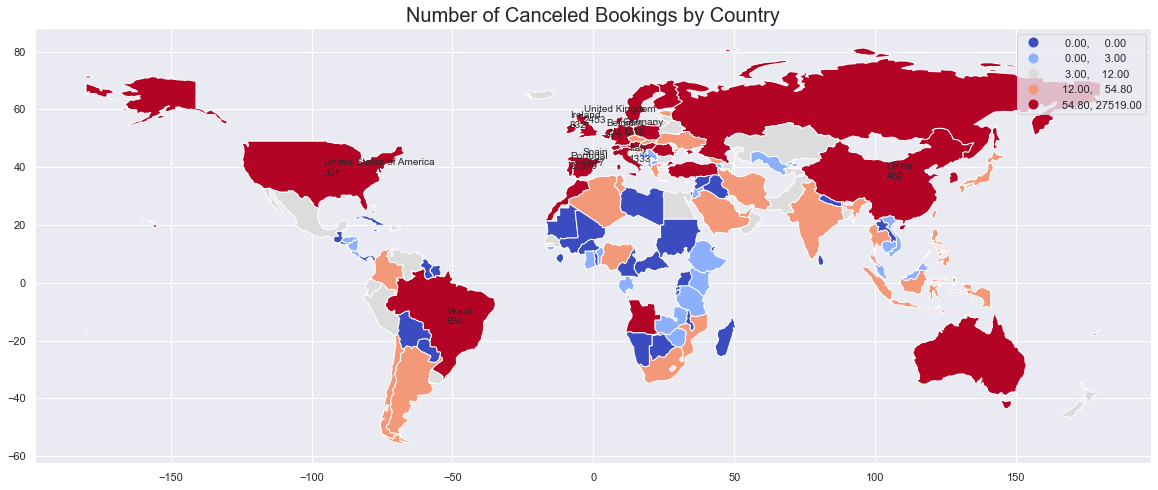

In [24]:
# plot the world map with countries with the top 10 cancel booking counts
merge.plot(column='is_canceled', scheme="quantiles", figsize=(20,15), legend=True, cmap='coolwarm')
plt.title('Number of Canceled Bookings by Country',fontsize=20)

# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.is_canceled[i]),size=10)
plt.show()

Reference: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
        
    

### Price vs Room Types

Text(0.5, 1.0, 'Price of Room by Room Types')

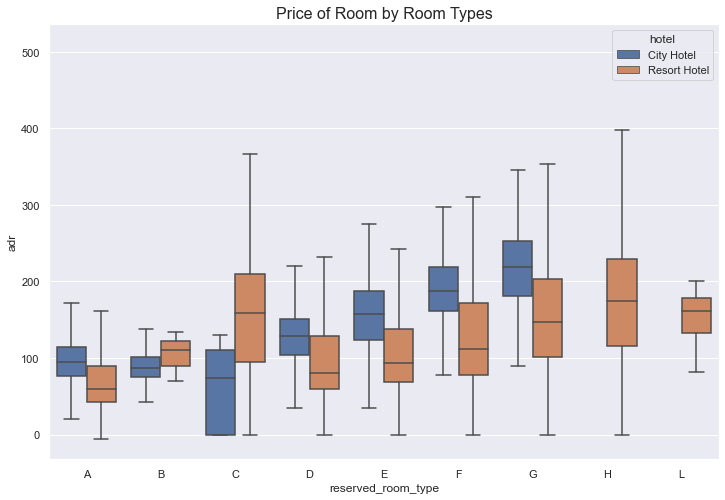

In [23]:
# select canceled booking data
df_cancel = df.loc[df["is_canceled"] == 0] 
room_prices = df_cancel[["hotel", "reserved_room_type", "adr"]].sort_values("reserved_room_type")

# box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x = "reserved_room_type",
            y = "adr",
            hue = "hotel",
            data = room_prices, 
            fliersize = 0) #Size of the markers used to indicate outlier observations
plt.title("Price of Room by Room Types", fontsize=16)


### Lead Time

/Users/yimi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

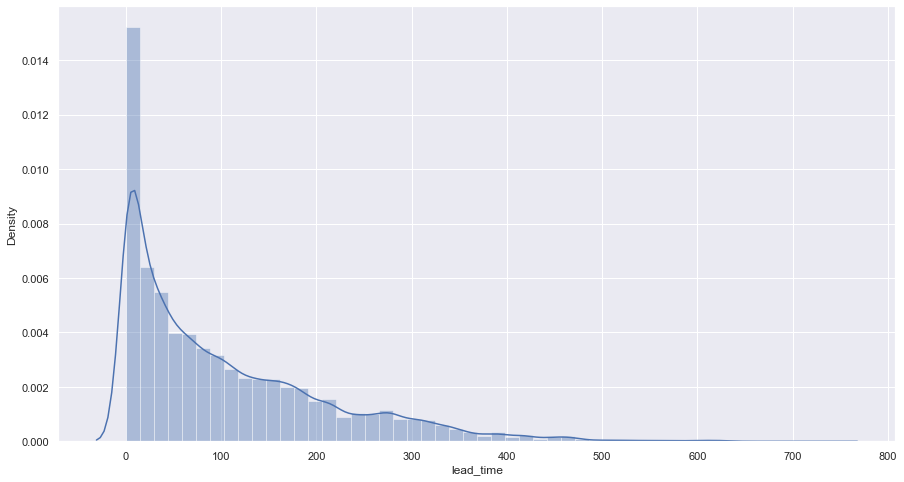

In [17]:
# let's now take a look at lead_time: date of booking prior to the arrival date
sns.distplot(df['lead_time'])
df['lead_time'].describe()

Text(0.5, 1.0, 'Lead Time Group by is_canceled')

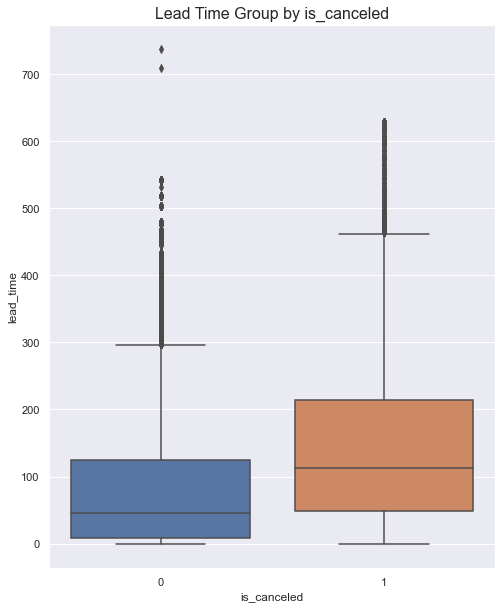

In [21]:
sns.set(rc = {'figure.figsize':(8,10)})
p = sns.boxplot( x = df["is_canceled"], y=df["lead_time"] )
p.set_title('Lead Time Group by is_canceled',fontsize = 16)

### Deposite Type vs Cancel Rate

In [18]:
# deposite type vs cancellation rate
nonrefund_canceled = len(df.loc[(df["deposit_type"] == 'Non Refund') & (df["is_canceled"] == 1)].index)
refundable_canceled = len(df.loc[(df["deposit_type"] == 'Refundable') & (df["is_canceled"] == 1)].index)
nodeposit_canceled = len(df.loc[(df["deposit_type"] == 'No Deposit') & (df["is_canceled"] == 1)].index)

# deposit_notcanceled = len(df.loc[(df["is_deposit"] == 1) & (df["is_canceled"] == 0)].index)
# nodeposit_notcanceled = len(df.loc[(df["is_deposit"] == 0) & (df["is_canceled"] == 0)].index)
nonrefund = len(df.loc[(df["deposit_type"] == 'Non Refund')].index)
refundable = len(df.loc[(df["deposit_type"] == 'Refundable')].index)
nodeposit = len(df.loc[(df["deposit_type"] == 'No Deposit')].index)

In [19]:
nonrefund_canceled_rate = nonrefund_canceled/nonrefund
refundable_canceled_rate = refundable_canceled/refundable
nodeposit_canceled_rate = nodeposit_canceled/nodeposit

In [20]:
print('Nonrefund Canceled rate: ',nonrefund_canceled_rate)
print('Refundable Canceled rate: ',refundable_canceled_rate)
print('No deposit Canceled rate: ',nodeposit_canceled_rate)

Nonrefund Canceled rate:  0.9936244601357374
Refundable Canceled rate:  0.2222222222222222
No deposit Canceled rate:  0.28377022390841067


Text(0.5, 1.0, 'Deposit Type VS. Cancel Rate')

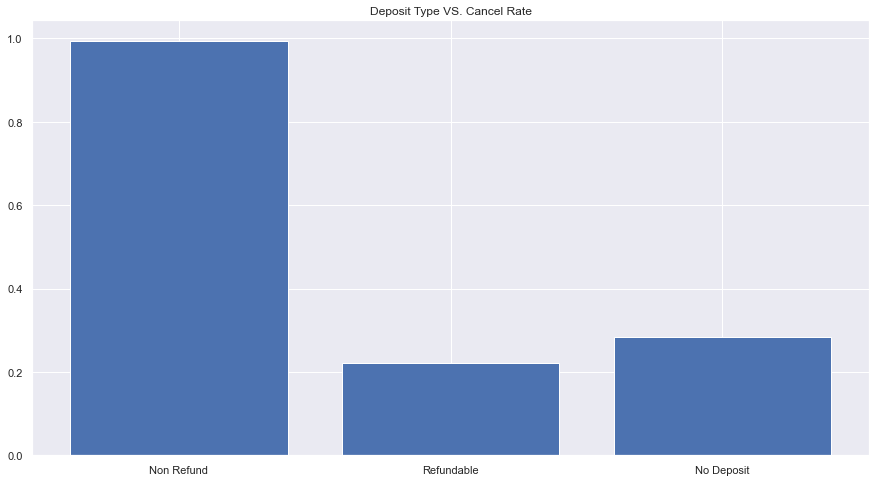

In [21]:
# initialize list of lists
data = [['Non Refund', nonrefund_canceled_rate], ['Refundable', refundable_canceled_rate],['No Deposit', nodeposit_canceled_rate]]
 
# Create the pandas DataFrame
cancellation_rate = pd.DataFrame(data, columns = ['rate', 'cancel_rate'])
 
# Plot the histogram
plt.bar(cancellation_rate['rate'], cancellation_rate['cancel_rate'])
plt.title('Deposit Type VS. Cancel Rate')

### Total of Special Requests

Text(0.5, 1.0, 'Number of Special Requests')

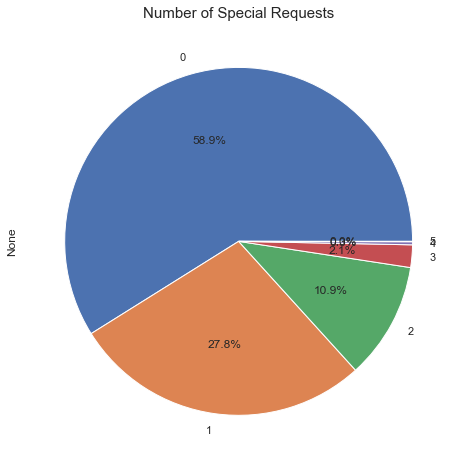

In [22]:
# total_of_special_requests
special_requests_df = df.groupby('total_of_special_requests').size()
ax = special_requests_df.plot(kind='pie', autopct='%1.1f%%')
ax.set_title("Number of Special Requests", fontsize=15)
# ax.axis('equal')

### Nights Stay

In [23]:
# combine "stays_in_weekend_nights" and "stays_in_week_nights" columns
df['stays_nights'] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

/Users/yimi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays_nights, dtype: float64

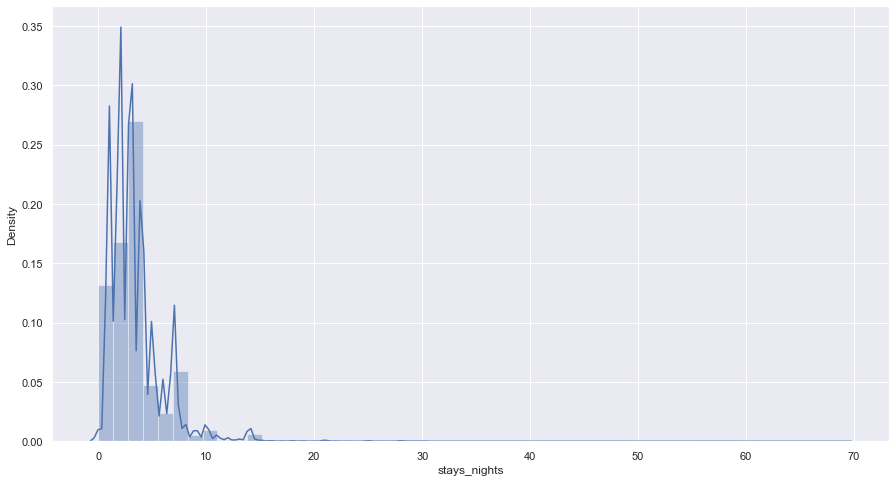

In [24]:
# let's look at "stays_nights" distribution
sns.distplot(df['stays_nights'])
df['stays_nights'].describe()

### Market Segment

<AxesSubplot:xlabel='market_segment', ylabel='count'>

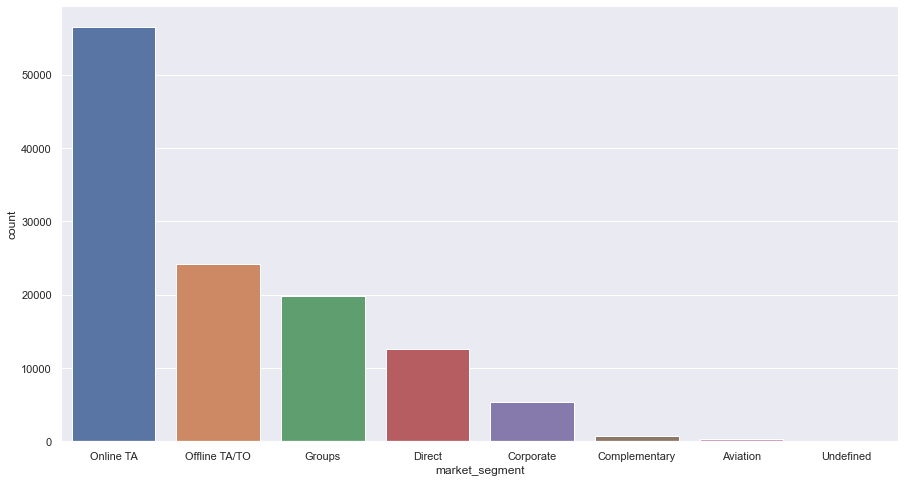

In [25]:
# understand what is 'market_segment'
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'market_segment', data = df, order = df['market_segment'].value_counts().index)

In [4]:
# cancellation by market_segment
cancellation = df.loc[df["is_canceled"] == 1]

[Text(0.5, 1.0, 'Canceled Booking Counts by Market Segment')]

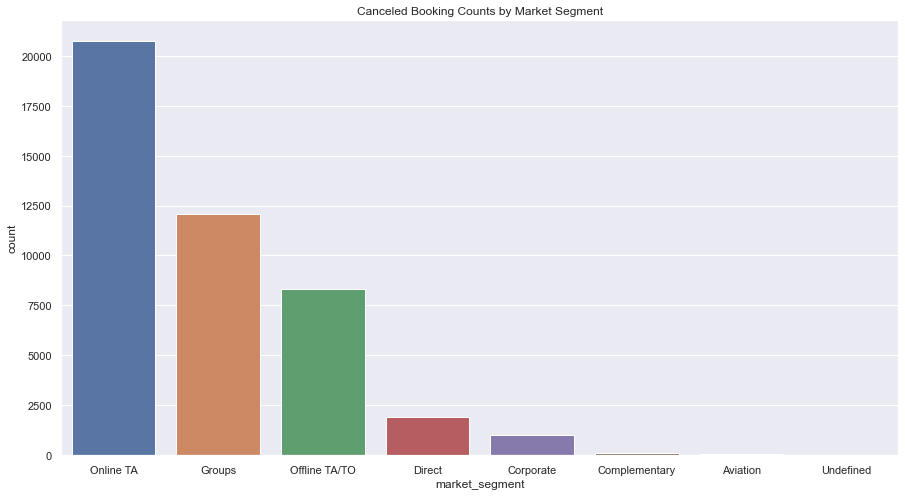

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x = 'market_segment', data = cancellation, order = cancellation['market_segment'].value_counts().index).set(title='Canceled Booking Counts by Market Segment')

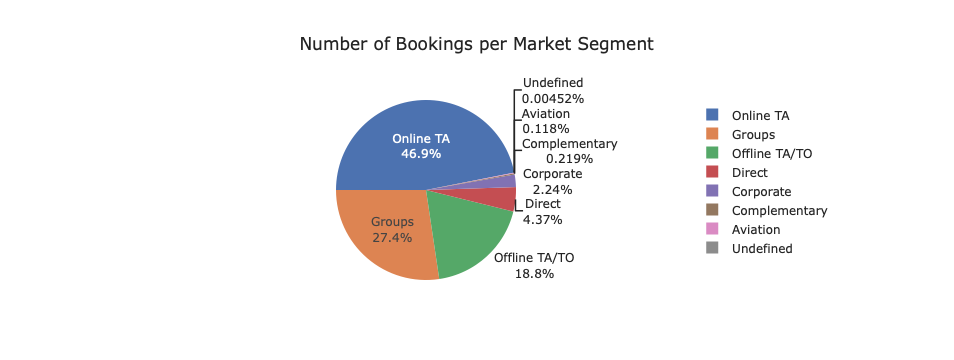

In [6]:
# total bookings per market segment
market_segment = cancellation["market_segment"].value_counts()

# pie plot
fig = px.pie(market_segment,
             values = market_segment.values,
             names = market_segment.index,
             title = "Number of Bookings per Market Segment",
             template = "seaborn")
fig.update_traces(rotation = -90, textinfo = "percent+label")
fig.show()

### Month vs. Cancel Rate

In [22]:
# Month vs. Cancel Rate
# Create a DateFrame with the relevant data:
# Resort
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# City
cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()


In [30]:
# Merge the two series for resort and city hotel
res_cancel_data = pd.merge(res_book_per_month,res_cancel_per_month,on='arrival_date_month').reset_index()
res_cancel_data["Hotel"] = "Resort Hotel"

cty_cancel_data = pd.merge(cty_book_per_month,cty_cancel_per_month,on='arrival_date_month').reset_index()
cty_cancel_data["Hotel"] = "City Hotel"

In [33]:
# Concat two dataframe
full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["is_canceled"] / full_cancel_data["hotel"] * 100

# Check
full_cancel_data.head()

,arrival_date_month,hotel,is_canceled,Hotel,cancel_percent
0,April,3609,1059,Resort Hotel,29.343308
1,August,4894,1637,Resort Hotel,33.449121
2,December,2648,631,Resort Hotel,23.829305
3,February,3103,795,Resort Hotel,25.620367
4,January,2193,325,Resort Hotel,14.819881


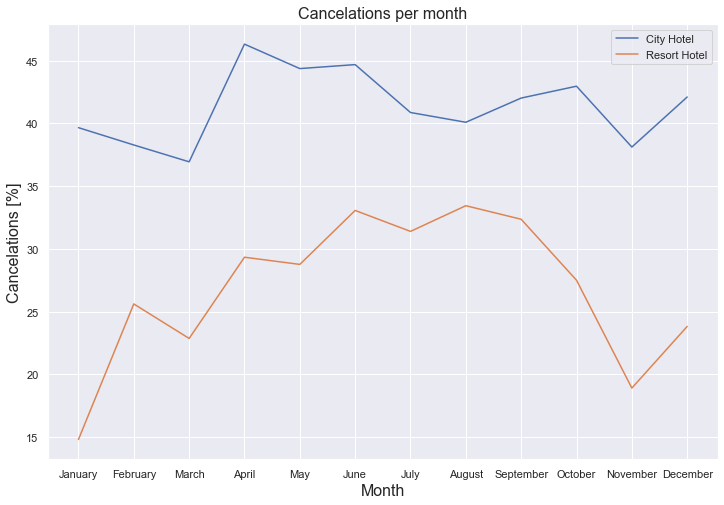

In [34]:
# Order by month:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_cancel_data["arrival_date_month"] = pd.Categorical(full_cancel_data["arrival_date_month"], categories=months, ordered=True)

# Show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

### Customer Type

In [35]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [36]:
customer_type_canceled = df.groupby("customer_type")["is_canceled"].sum()
customer_type_total = df.groupby("customer_type")["hotel"].count()
# Merge the two series
customer_type_canceled_rate = pd.merge(customer_type_canceled,customer_type_total,on='customer_type').reset_index()
customer_type_canceled_rate["not_cancel"] = customer_type_canceled_rate["hotel"]- customer_type_canceled_rate["is_canceled"]
customer_type_canceled_rate["cancel_percent"] = customer_type_canceled_rate["is_canceled"] / customer_type_canceled_rate["hotel"]*100
customer_type_canceled_rate

,customer_type,is_canceled,hotel,not_cancel,cancel_percent
0,Contract,1262,4076,2814,30.961727
1,Group,59,577,518,10.225303
2,Transient,36514,89613,53099,40.746320
3,Transient-Party,6389,25124,18735,25.429868


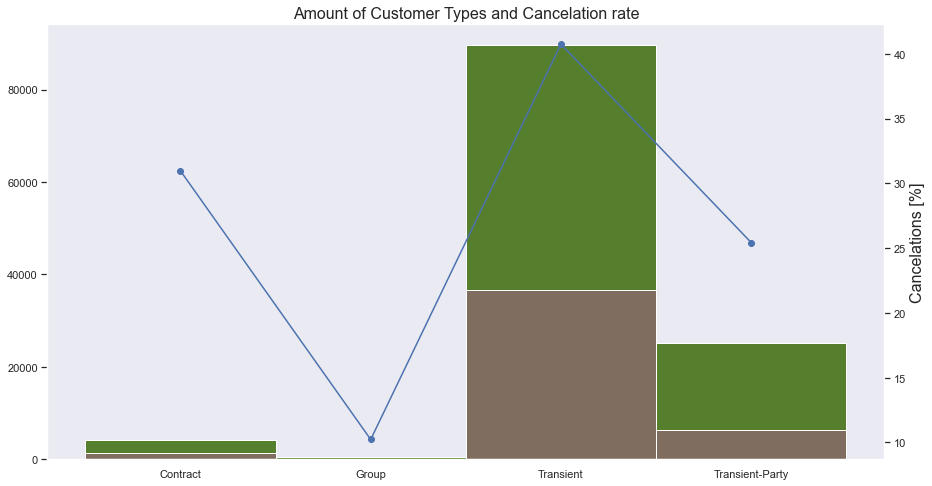

In [37]:
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = list(customer_type_canceled_rate['customer_type'])
barWidth = 1
 
# Create brown bars
plt.bar(r, customer_type_canceled_rate["is_canceled"], color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, customer_type_canceled_rate["not_cancel"], bottom=customer_type_canceled_rate["is_canceled"], color='#557f2d', edgecolor='white', width=barWidth)
customer_type_canceled_rate["cancel_percent"].plot(marker='o',secondary_y=True)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.title("Amount of Customer Types and Cancelation rate", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.grid(False)
 
# Show graphic
plt.show()

In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Plot the histogram thanks to the distplot function
sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False )

In [ ]:
# Drop unecessary columns
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','meal',
              'country','reserved_room_type', 'assigned_room_type','days_in_waiting_list','agent','company','reservation_status',
              'reservation_status_date'], axis = 1)

In [ ]:
# Categorical variable for resort hotel
df['is_resort'] = df['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)
df = df.drop('hotel', axis = 1)

In [ ]:
# Categorical variable for deposit
df['is_deposit'] = df['deposit_type'].apply(lambda x: 0 if x == 'No Deposit' else 1)
df = df.drop('deposit_type', axis = 1)

In [ ]:
# Categorical variable for customer type
df['is_contract'] = df['customer_type'].apply(lambda x: 1 if x == 'Contract' else 0)
df = df.drop('customer_type', axis = 1)

In [ ]:
# Categorical variable for market segement and distribution channel
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
df['market_segment'] = le.fit_transform(df['market_segment'].values)
df['distribution_channel'] = le.fit_transform(df['distribution_channel'].values)

In [ ]:
df.info()

In [ ]:
# Check if any column has null
for i in list(df.columns):
    if np.any(np.isnan(df[i])) == True:
        print(i)

In [ ]:
# Fill 0 for null in children
df['children'].fillna(value = 0 , inplace=True)

In [ ]:
# Create train set and test test
x,y = df.drop (['is_canceled'],axis = 1 ), df['is_canceled']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.8, test_size = 0.2)

In [ ]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_x, train_y)
    print(classifier.score(test_x, test_y))
    return classifier

In [ ]:
decision_tree = dmp_first_classifier(SGDClassifier)

In [ ]:
# Decision Tree Regression
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(train_x, train_y)

# Use trained RidgeCV regression model to predict interest rates of training and test data
train_pred1 = regr.predict(test_x)

# Print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(test_y, train_pred1)))

In [ ]:
random_forest = dmp_first_classifier(RandomForestClassifier)

In [ ]:
# Linear regression object
ridge = RidgeCV(cv=10)

# Fit the linear regression model on the training set 
ridge.fit(train_x, train_y)


In [ ]:
# Use trained RidgeCV regression model to predict interest rates of training and test data
train_pred = ridge.predict(test_x)

# Print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(test_y, train_pred)))